### http://profitraders.com/MachineLearning/scikit-learn-01.html

In [10]:
import datetime
import numpy as np
import pandas as pd
import sklearn
from pandas_datareader import DataReader

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)

In [11]:
symbol = "^GSPC"  # Код финансового инструмента на сайте Yahoo Finance
start_date = datetime.datetime(2013, 7, 1) # Начальная дата - 1 июля 2013
end_date = datetime.datetime(2014, 4, 30)  # Конечная дата - 30 апреля 2014
ts1 = DataReader(symbol, "yahoo", start_date, end_date)
print(ts1.head(3) )# Вывод первых трёх строк таблицы
print(ts1.tail(2) )

                   High          Low         Open        Close      Volume    Adj Close
Date                                                                                   
2013-07-01  1626.609985  1609.780029  1609.780029  1614.959961  3104690000  1614.959961
2013-07-02  1624.260010  1606.770020  1614.290039  1614.079956  3317130000  1614.079956
2013-07-03  1618.969971  1604.569946  1611.479980  1615.410034  1966050000  1615.410034
                   High          Low         Open        Close      Volume    Adj Close
Date                                                                                   
2014-04-29  1880.599976  1870.780029  1870.780029  1878.329956  3647820000  1878.329956
2014-04-30  1885.199951  1872.689941  1877.099976  1883.949951  3779230000  1883.949951


In [12]:
ts2 = pd.DataFrame(index=ts1.index)
ts2["Today"] = ts1["Adj Close"]
ts2["Volume"] = ts1["Volume"]
print(ts2.head(3))

                  Today      Volume
Date                               
2013-07-01  1614.959961  3104690000
2013-07-02  1614.079956  3317130000
2013-07-03  1615.410034  1966050000


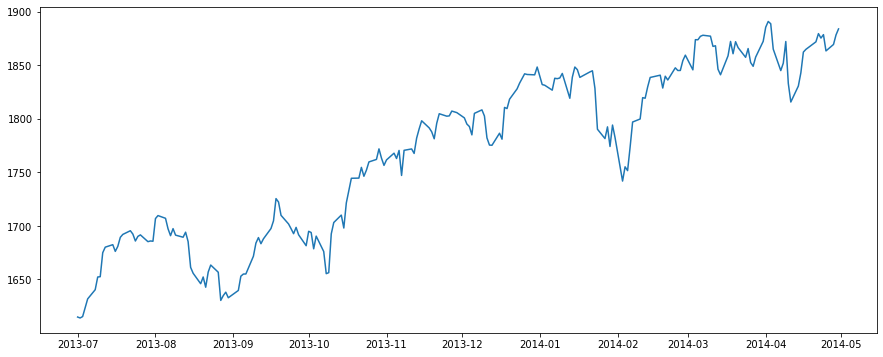

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
pd.plotting.register_matplotlib_converters()

df = pd.DataFrame(ts2['Today'])
df.rename({'Today': 'y', 'Date': 'ds'}, axis=1, inplace=True)
plt.plot(df)

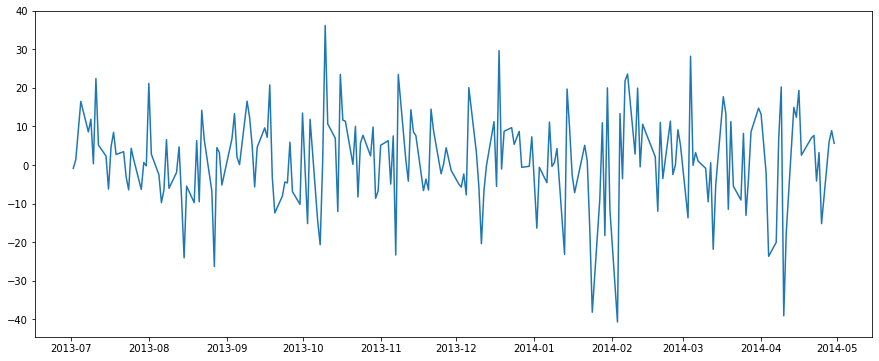

In [14]:
import statsmodels.api as sm

df['y_diff'] = df.y - df.y.shift(1)
df.dropna(inplace=True)
plt.plot(df.y_diff)

In [15]:
count = 2
for i in range(0, count):
    ts2["Lag%s" % str(i+1)] = ts1["Adj Close"].shift(i+1)

print(ts2.head(3))

                  Today      Volume         Lag1         Lag2
Date                                                         
2013-07-01  1614.959961  3104690000          NaN          NaN
2013-07-02  1614.079956  3317130000  1614.959961          NaN
2013-07-03  1615.410034  1966050000  1614.079956  1614.959961


In [16]:
ts = pd.DataFrame(index=ts2.index)
ts["Volume"] = ts2["Volume"]
ts["Today"] = ts2["Today"].pct_change()*100.0

for i,x in enumerate(ts["Today"]):
        if (abs(x) < 0.0001):
            ts["Today"][i] = 0.0001

print (ts.head(3))

                Volume     Today
Date                            
2013-07-01  3104690000       NaN
2013-07-02  3317130000 -0.054491
2013-07-03  1966050000  0.082405


In [17]:
for i in range(0, count):
    ts["Lag%s" % str(i+1)] = ts2["Lag%s" % str(i+1)].pct_change()*100.0

ts["Direction"] = np.sign(ts["Today"])
ts = ts[count+1:]  # Пропустили первые count дней, т.к. для них некоторые данные не определены (NaN)
print (ts.head(7))

                Volume     Today      Lag1      Lag2  Direction
Date                                                           
2013-07-05  2634140000  1.020173  0.082405 -0.054491        1.0
2013-07-08  3514590000  0.525155  1.020173  0.082405        1.0
2013-07-09  3155360000  0.722967  0.525155  1.020173        1.0
2013-07-10  3011010000  0.018159  0.722967  0.525155        1.0
2013-07-11  3446340000  1.355425  0.018159  0.722967        1.0
2013-07-12  3039070000  0.308648  1.355425  0.018159        1.0
2013-07-15  2623200000  0.137488  0.308648  1.355425        1.0


In [18]:
start_test = datetime.datetime(2014,1,1) # Начало тестового набора данных - 1 января 2014

In [19]:
cols = []
for i in range(0, count):
    cols.extend(["Lag%s" % str(i+1)])

print (cols)

['Lag1', 'Lag2']


In [20]:
x = ts[cols] # Входные данные для обучения
y = ts["Direction"]     # Целевые значения

x_train = x[x.index < start_test] # Входные данные для обучения (март)
print (x_train[0:5]) # Вывели для проверки первые 5 строк обучающей выборки
x_test = x[x.index >= start_test] # Входные данные для теста (апрель)
print (x_test[0:5]) # Вывели для проверки первые 5 строк тестовой выборки

y_train = y[y.index < start_test] # Целевые значения для обучения (март)
print (y_train[0:5])
y_test = y[y.index >= start_test] # Целевые значения для теста (апрель)
print (y_test[0:5])

#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler().fit(x_train)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)
#print x_train[0:5] # Вывели для проверки первые 5 строк обучающей выборки после масштабирования

d = pd.DataFrame(index=y_test.index) # Набор данных для проверки модели
d["Actual"] = y_test                 # Реальные изменения цен закрытия

                Lag1      Lag2
Date                          
2013-07-05  0.082405 -0.054491
2013-07-08  1.020173  0.082405
2013-07-09  0.525155  1.020173
2013-07-10  0.722967  0.525155
2013-07-11  0.018159  0.722967
                Lag1      Lag2
Date                          
2014-01-02  0.395968 -0.017925
2014-01-03 -0.886191  0.395968
2014-01-06 -0.033297 -0.886191
2014-01-07 -0.251177 -0.033297
2014-01-08  0.608176 -0.251177
Date
2013-07-05    1.0
2013-07-08    1.0
2013-07-09    1.0
2013-07-10    1.0
2013-07-11    1.0
Name: Direction, dtype: float64
Date
2014-01-02   -1.0
2014-01-03   -1.0
2014-01-06   -1.0
2014-01-07    1.0
2014-01-08   -1.0
Name: Direction, dtype: float64


[[ 0.08240472 -0.05449082]
 [ 1.02017321  0.08240472]
 [ 0.52515465  1.02017321]
 [ 0.72296707  0.52515465]
 [ 0.01815925  0.72296707]]
[1. 1. 1. 1. 1.]


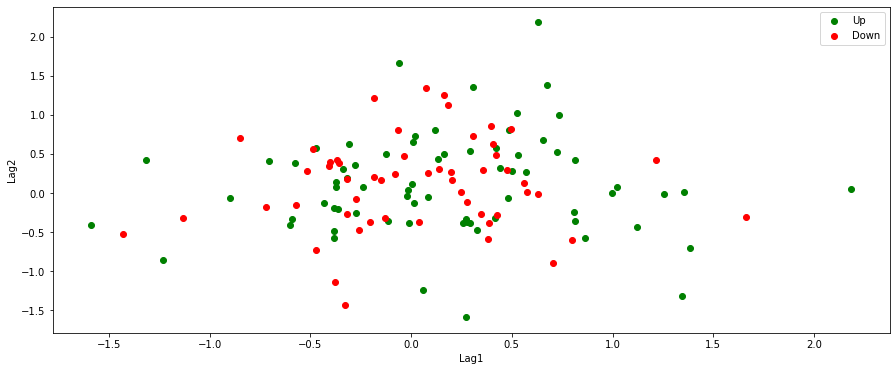

In [21]:
import matplotlib.pyplot as plt
x_tr = x_train.values[:]
y_tr = y_train.values[:]
print (x_tr[0:5])
print (y_tr[0:5])

xs = x_tr[:, 0][y_tr == 1]
ys = x_tr[:, 1][y_tr == 1]
plt.scatter(xs, ys, c="green")

xs = x_tr[:, 0][y_tr == -1]
ys = x_tr[:, 1][y_tr == -1]
plt.scatter(xs, ys, c="red")

plt.legend(["Up", "Down"])
plt.xlabel('Lag1')
plt.ylabel('Lag2')
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)     # Обучение (подбор параметров модели)
d['Predict_LR'] = model1.predict(x_test) # Тест

# Считаем процент правильно предсказанных направлений изменения цены:
d["Correct_LR"] = (1.0+d['Predict_LR']*d["Actual"])/2.0
print (d)
hit_rate1 = np.mean(d["Correct_LR"])
print ("Процент верных предсказаний: %.1f%%" % (hit_rate1*100))

            Actual  Predict_LR  Correct_LR
Date                                      
2014-01-02    -1.0         1.0         0.0
2014-01-03    -1.0        -1.0         1.0
2014-01-06    -1.0         1.0         0.0
2014-01-07     1.0         1.0         1.0
2014-01-08    -1.0         1.0         0.0
...            ...         ...         ...
2014-04-24     1.0         1.0         1.0
2014-04-25    -1.0         1.0         0.0
2014-04-28     1.0        -1.0         0.0
2014-04-29     1.0         1.0         1.0
2014-04-30     1.0         1.0         1.0

[82 rows x 3 columns]
Процент верных предсказаний: 56.1%


/Users/kupuk/Projects/Time Series Forecasting/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model2 = LDA()
model2.fit(x_train, y_train)     # Обучение (подбор параметров модели)
d['Predict_LDA'] = model2.predict(x_test) # Тест

# Считаем процент правильно предсказанных направлений изменения цены:
d["Correct_LDA"] = (1.0+d['Predict_LDA']*d["Actual"])/2.0
print (d)
hit_rate2 = np.mean(d["Correct_LDA"])
print ("Процент верных предсказаний: %.1f%%" % (hit_rate2*100))

            Actual  Predict_LR  Correct_LR  Predict_LDA  Correct_LDA
Date                                                                
2014-01-02    -1.0         1.0         0.0          1.0          0.0
2014-01-03    -1.0        -1.0         1.0         -1.0          1.0
2014-01-06    -1.0         1.0         0.0          1.0          0.0
2014-01-07     1.0         1.0         1.0          1.0          1.0
2014-01-08    -1.0         1.0         0.0          1.0          0.0
...            ...         ...         ...          ...          ...
2014-04-24     1.0         1.0         1.0          1.0          1.0
2014-04-25    -1.0         1.0         0.0          1.0          0.0
2014-04-28     1.0        -1.0         0.0         -1.0          0.0
2014-04-29     1.0         1.0         1.0          1.0          1.0
2014-04-30     1.0         1.0         1.0          1.0          1.0

[82 rows x 5 columns]
Процент верных предсказаний: 54.9%


In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model3 = QDA()
model3.fit(x_train, y_train)     # Обучение (подбор параметров модели)
d['Predict_QDA'] = model3.predict(x_test) # Тест

# Считаем процент правильно предсказанных направлений изменения цены:
d["Correct_QDA"] = (1.0+d['Predict_QDA']*d["Actual"])/2.0
print (d)
hit_rate3 = np.mean(d["Correct_QDA"])
print ("Процент верных предсказаний: %.1f%%" % (hit_rate3*100))

            Actual  Predict_LR  Correct_LR  Predict_LDA  Correct_LDA  Predict_QDA  Correct_QDA
Date                                                                                          
2014-01-02    -1.0         1.0         0.0          1.0          0.0          1.0          0.0
2014-01-03    -1.0        -1.0         1.0         -1.0          1.0          1.0          0.0
2014-01-06    -1.0         1.0         0.0          1.0          0.0          1.0          0.0
2014-01-07     1.0         1.0         1.0          1.0          1.0         -1.0          0.0
2014-01-08    -1.0         1.0         0.0          1.0          0.0          1.0          0.0
...            ...         ...         ...          ...          ...          ...          ...
2014-04-24     1.0         1.0         1.0          1.0          1.0         -1.0          0.0
2014-04-25    -1.0         1.0         0.0          1.0          0.0          1.0          0.0
2014-04-28     1.0        -1.0         0.0        

In [25]:
from sklearn.ensemble import RandomForestRegressor as RFR
model4 = RFR()
model4.fit(x_train, y_train)     # Обучение (подбор параметров модели)
d['Predict_RFR'] = model4.predict(x_test) # Тест

# Считаем процент правильно предсказанных направлений изменения цены:
d["Correct_RFR"] = (1.0+d['Predict_RFR']*d["Actual"])/2.0
print (d)
hit_rate3 = np.mean(d["Correct_RFR"]) 
print ("Процент верных предсказаний: %.1f%%" % (hit_rate3*100))

/Users/kupuk/Projects/Time Series Forecasting/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


            Actual  Predict_LR  Correct_LR  Predict_LDA  Correct_LDA  Predict_QDA  Correct_QDA  Predict_RFR  Correct_RFR
Date                                                                                                                    
2014-01-02    -1.0         1.0         0.0          1.0          0.0          1.0          0.0         -1.0          1.0
2014-01-03    -1.0        -1.0         1.0         -1.0          1.0          1.0          0.0          0.4          0.3
2014-01-06    -1.0         1.0         0.0          1.0          0.0          1.0          0.0          0.0          0.5
2014-01-07     1.0         1.0         1.0          1.0          1.0         -1.0          0.0          0.6          0.8
2014-01-08    -1.0         1.0         0.0          1.0          0.0          1.0          0.0         -0.6          0.8
...            ...         ...         ...          ...          ...          ...          ...          ...          ...
2014-04-24     1.0         1.0  